In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
training = pd.read_csv('training_dataset.csv')
training.drop(["total_watts", "w_big", "w_little", "w_gpu", "w_mem"], axis=1, inplace=True)

blackscholes = pd.read_csv('testing_blackscholes.csv')
blackscholes.drop(["total_watts", "w_big", "w_little", "w_gpu", "w_mem"], axis=1, inplace=True)

bodytrack = pd.read_csv('testing_bodytrack.csv')
bodytrack.drop(["total_watts", "w_big", "w_little", "w_gpu", "w_mem"], axis=1, inplace=True)

datasets = {"blackscholes": blackscholes, "bodytrack": bodytrack}

In [26]:
# Import MLPRegressor
from sklearn.neural_network import MLPRegressor

# Create a MLPRegressor for each core 4 to 7
mlp_4 = MLPRegressor(hidden_layer_sizes = (128, 64, 32), activation = 'relu', random_state = 42)
mlp_5 = MLPRegressor(hidden_layer_sizes = (128, 64, 32), activation = 'relu', random_state = 42)
mlp_6 = MLPRegressor(hidden_layer_sizes = (128, 64, 32), activation = 'relu', random_state = 42)
mlp_7 = MLPRegressor(hidden_layer_sizes = (128, 64, 32), activation = 'relu', random_state = 42)

models = {"4": mlp_4, "5": mlp_5, "6": mlp_6, "7": mlp_7}

Training core: 4
Dataset: blackscholes
Core: 4
MSE: 11751818.56507686



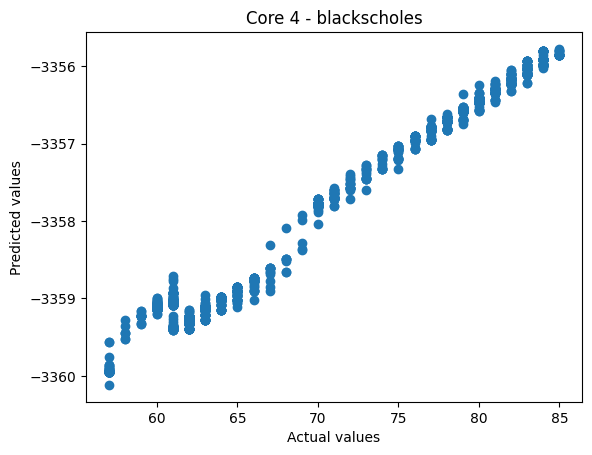

Dataset: bodytrack
Core: 4
MSE: 11783232.540943285



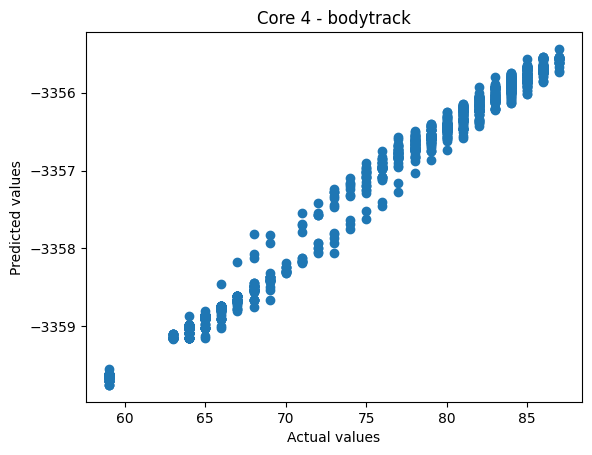

Training core: 5
Dataset: blackscholes
Core: 5
MSE: 12034927.017288774



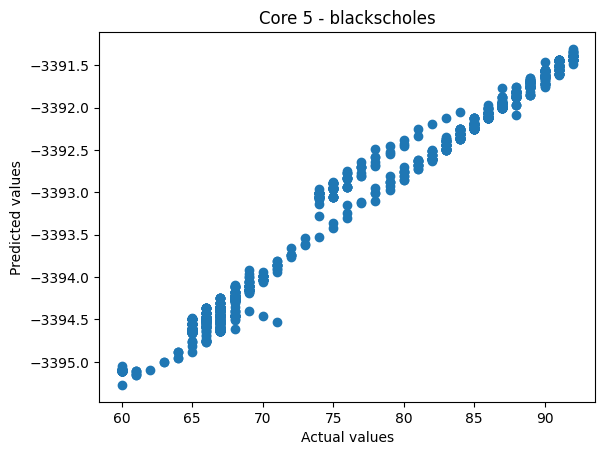

Dataset: bodytrack
Core: 5
MSE: 12069581.47293627



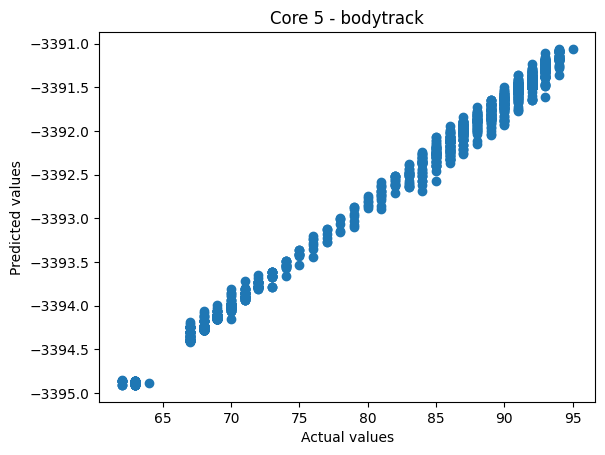

Training core: 6
Dataset: blackscholes
Core: 6
MSE: 12041805.749079257



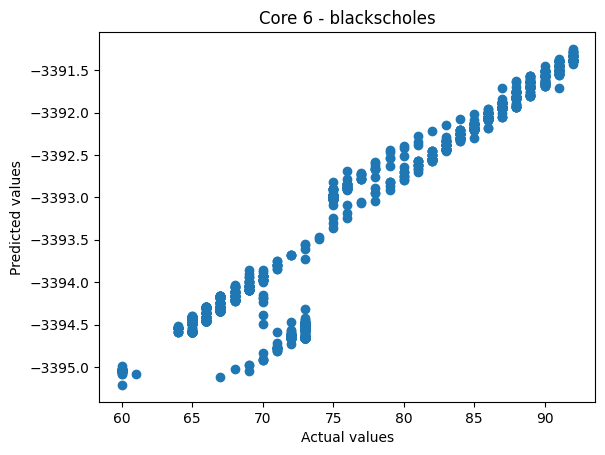

Dataset: bodytrack
Core: 6
MSE: 12068110.900542706



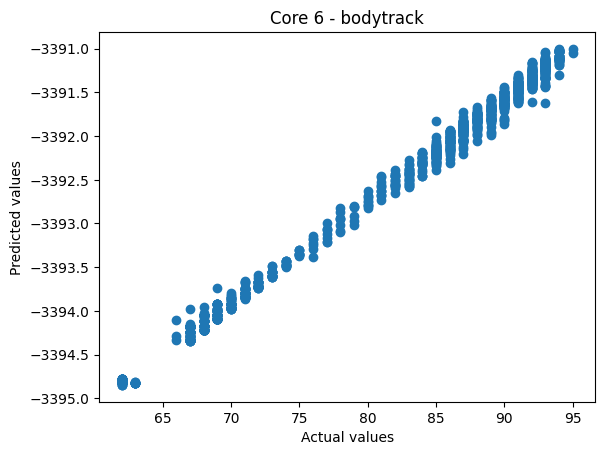

Training core: 7
Dataset: blackscholes
Core: 7
MSE: 12022421.619406888



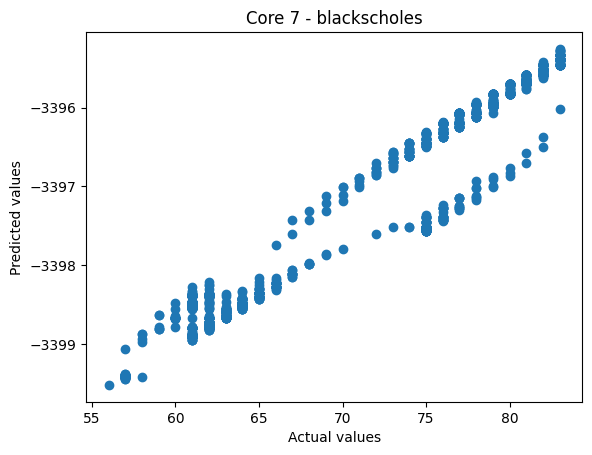

Dataset: bodytrack
Core: 7
MSE: 12049524.454914728



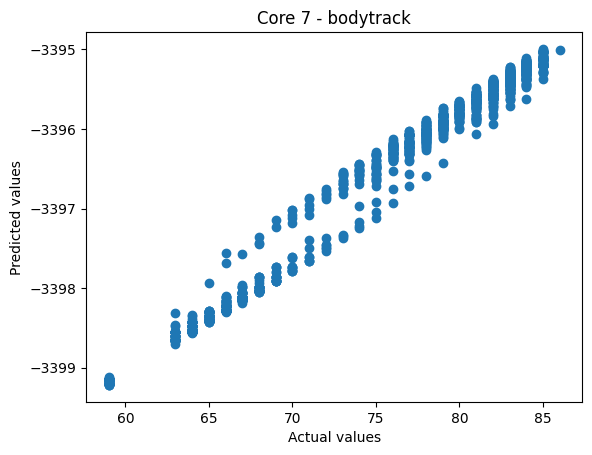

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

for model in models.keys():
    print("Training core: " + model)
    usage = "usage_c" + model
    temp = "temp" + model
    x_training = training[[usage, "temp_gpu", "freq_big_cluster"]]
    y_training = training[[temp]]
    x_train, x_test, y_train, y_test = train_test_split(x_training, y_training, test_size = 0.2, random_state = 42)
    models[model].fit(x_train, y_train.values.ravel())

    for dataset in datasets.keys():
        x = datasets[dataset][[usage, "temp_gpu", "freq_big_cluster"]]
        y = datasets[dataset][[temp]]
        y = y.values.ravel()
        y_pred = models[model].predict(x)

        print("Dataset: " + dataset)
        print("Core: " + model)
        print("MSE: " + str(mean_squared_error(y, y_pred)))
        print()

        # Plot the predicted values vs the actual values
        plt.scatter(y, y_pred)
        plt.xlabel("Actual values")
        plt.ylabel("Predicted values")
        plt.title("Core " + model + " - " + dataset)
        plt.show()